In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('./data/index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-11-01,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
1,2014-11-02,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
2,2014-11-03,4638.91015,2017.81005,17366.2402,1952.97,6.24,1.45,0.232372,3.843583,5.998912,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
3,2014-11-04,4623.64013,2012.09997,17383.8398,1935.19,6.15,1.43,0.232520,3.815476,5.955043,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
4,2014-11-05,4620.72021,2023.56994,17484.5292,1931.43,6.08,1.42,0.233553,3.824611,5.969301,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2024-06-26,17805.16010,5477.89990,39127.8007,2792.05,38.15,1.56,0.040891,33.713045,52.617977,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3526,2024-06-27,17858.67960,5482.87011,39164.0585,2784.06,38.29,1.57,0.041003,33.847424,52.827711,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3527,2024-06-28,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3528,2024-06-29,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"


In [8]:
# 삼성 주식 데이터 가져오기
df = stock_data[['Date', 'samsung_Close', '미국 중앙은행 기준금리', '미국 국내총생산(GDP) 전분기 대비', 'dollar_to_won_Close']]
df

,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close
0,2014-11-01,24880.0,0.09,17912.079,1053.80004
1,2014-11-02,24880.0,0.09,17912.079,1053.80004
2,2014-11-03,24700.0,0.09,17912.079,1051.19995
3,2014-11-04,24340.0,0.09,17912.079,1081.59997
4,2014-11-05,24040.0,0.09,17912.079,1076.90002
...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995


In [24]:
df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])
df

C:\Users\4호실-3\AppData\Local\Temp\ipykernel_5816\2126781118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])


,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close,US_GDP_KRW
0,2014-11-01,24880.0,0.09,17912.079,1053.80004,18875750.0
1,2014-11-02,24880.0,0.09,17912.079,1053.80004,18875750.0
2,2014-11-03,24700.0,0.09,17912.079,1051.19995,18829177.0
3,2014-11-04,24340.0,0.09,17912.079,1081.59997,19373704.0
4,2014-11-05,24040.0,0.09,17912.079,1076.90002,19289518.0
...,...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001,39820003.0
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000,39891289.0
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995,39707202.0
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995,39707202.0


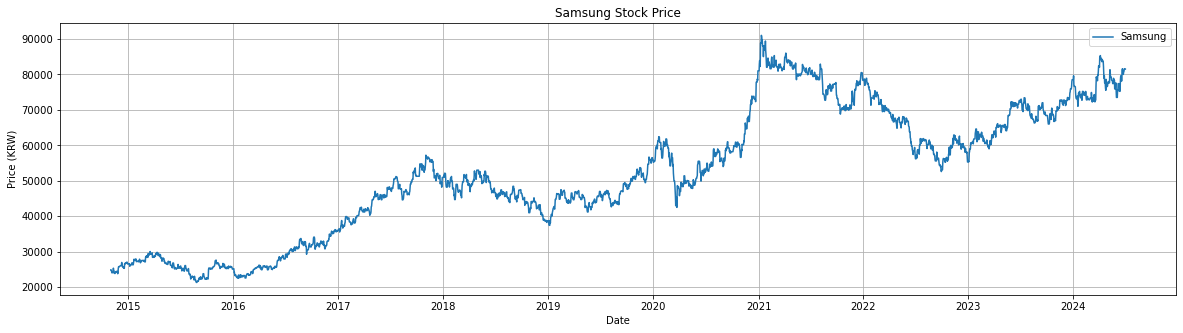

In [5]:
# 삼성 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')

plt.title('Samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()


c:\myProgram\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\myProgram\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\myProgram\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\myProgram\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\myProgram\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


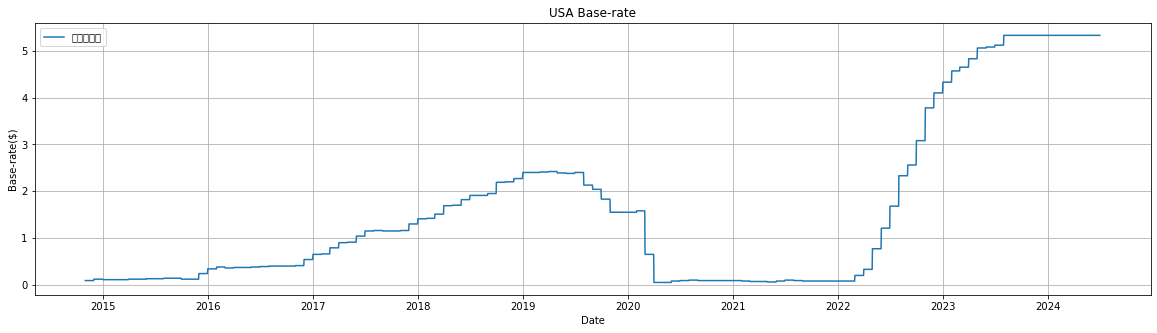

In [7]:
# 미국 기준금리 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['미국 중앙은행 기준금리'], label='미기준금리')

plt.title('USA Base-rate')
plt.xlabel('Date')
plt.ylabel('Base-rate($)')
plt.legend()
plt.grid(True)

plt.show()

In [10]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [11]:
samsung_normal_df = normalize(df, 'samsung_Close')
baserate_df = normalize(df, '미국 중앙은행 기준금리')

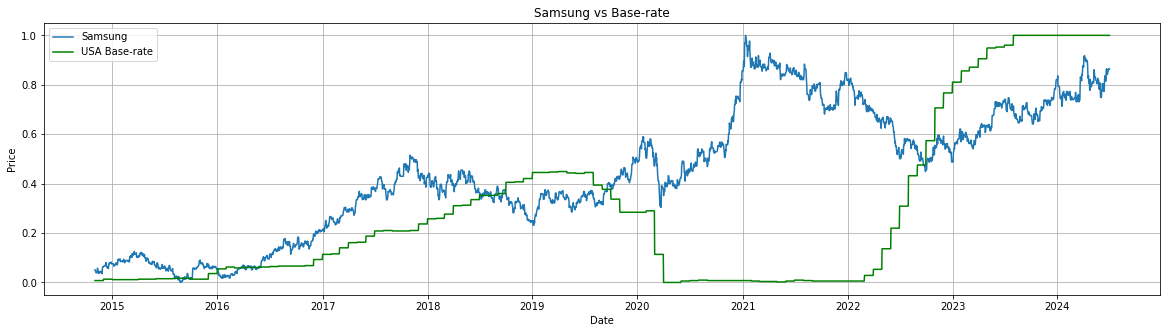

In [12]:
# 정규화 적용 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], samsung_normal_df, label='Samsung')
plt.plot(df['Date'], baserate_df, label='USA Base-rate', color='green')

plt.title('Samsung vs Base-rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

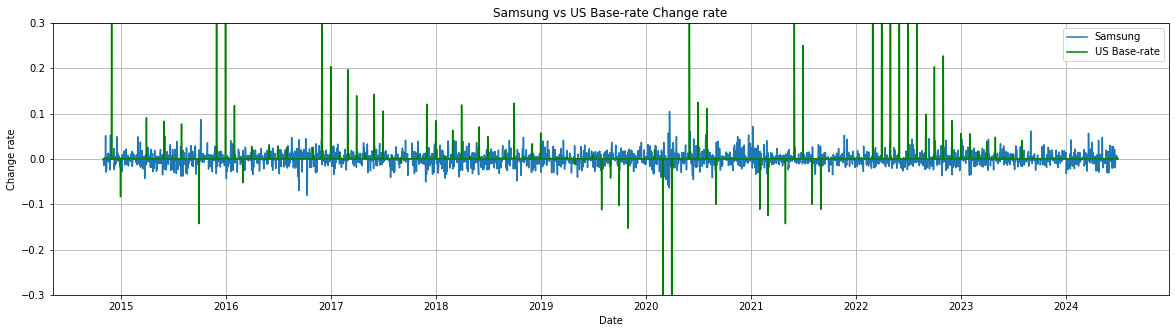

In [35]:
# 변동율 차이 비교

# 일간 변동률 계산 (판다스 함수 이용)  # shift(1) 이용하여 차이 게산도 가능
daily_change_samsung = df['samsung_Close'].pct_change()
daily_change_USbaserate = df['미국 중앙은행 기준금리'].pct_change()

# 그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], daily_change_samsung, label='Samsung')
plt.plot(df['Date'], daily_change_USbaserate, label='US Base-rate', color='green')
plt.ylim(-0.3, 0.3)

plt.title('Samsung vs US Base-rate Change rate')
plt.xlabel('Date')
plt.ylabel('Change rate')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


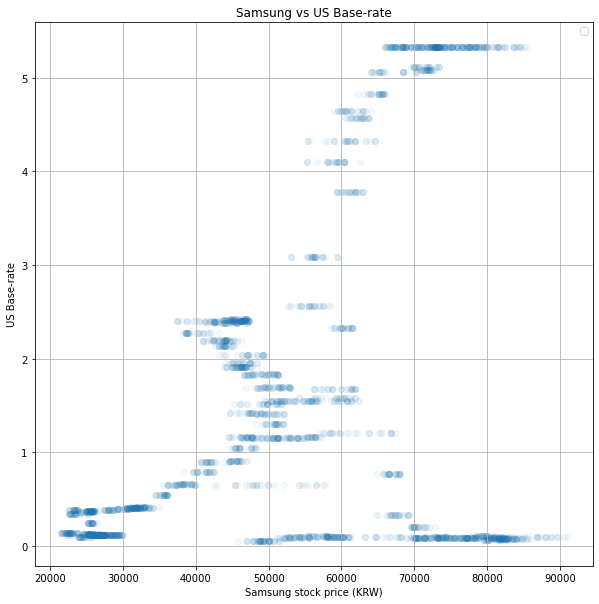

In [40]:
# 삼성 주식과 미기준금리 삼점도

plt.figure(figsize=(10,10))
plt.scatter(df['samsung_Close'], df['미국 중앙은행 기준금리'], alpha=0.05)

plt.title('Samsung vs US Base-rate')
plt.xlabel('Samsung stock price (KRW)')
plt.ylabel('US Base-rate')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
# Calculate the correlation
correlation = df['미국 중앙은행 기준금리'].corr(df['samsung_Close'])
print(f"Correlation between US Base-rate and Samsung Stock Price: {correlation:.2f}")

Correlation between US Base-rate and Samsung Stock Price: 0.39
